## data dictionary

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the Crime dataset
df=pd.read_csv(r'C:\\Users\\delll\\Desktop\\Python\\DataSets\\crime_data.csv ')
df.head()

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
df.shape

(50, 5)

In [5]:
df.columns

Index(['Name', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.isnull().sum()

Name        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
m=df.describe()

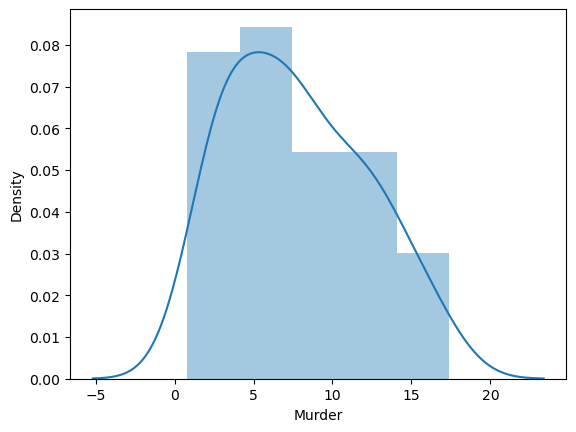

skewness: 0.3939564324470969
Kurtosis: -0.8274883426625128


In [17]:
sns.distplot(df['Murder'])
plt.show()
print("skewness:",df['Murder'].skew())
print("Kurtosis:",df['Murder'].kurtosis())
    

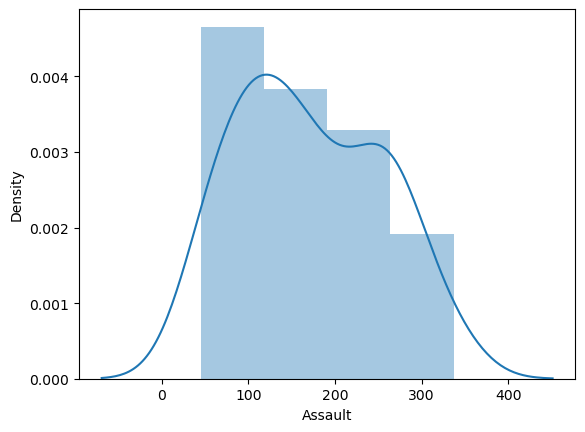

skewness: 0.2344095905541752
Kurtosis: -1.0538480092558156


In [18]:
sns.distplot(df['Assault'])
plt.show()
print("skewness:",df['Assault'].skew())
print("Kurtosis:",df['Assault'].kurtosis())

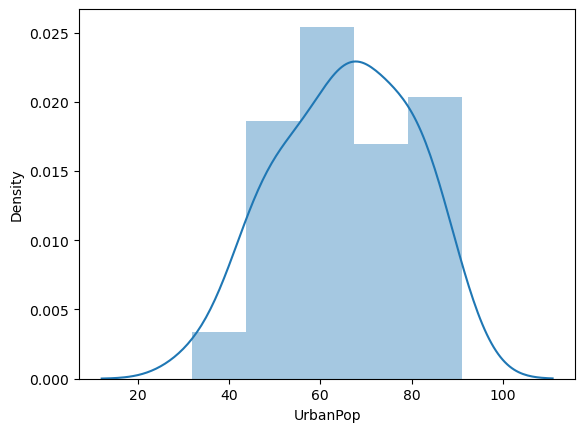

skewness: -0.22600946066699326
Kurtosis: -0.7383599976951776


In [19]:
sns.distplot(df['UrbanPop'])
plt.show()
print("skewness:",df['UrbanPop'].skew())
print("Kurtosis:",df['UrbanPop'].kurtosis())

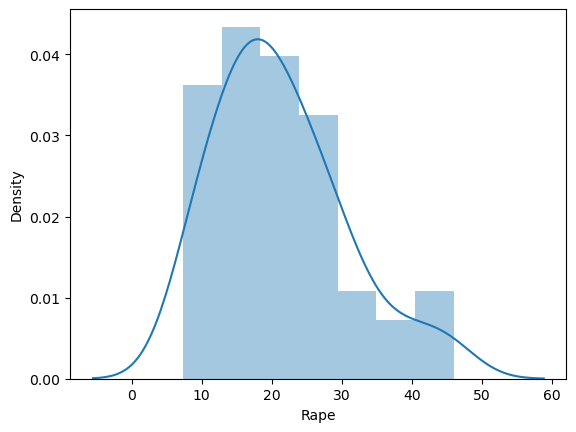

skewness: 0.8012004849360391
Kurtosis: 0.3539639117542448


In [26]:
sns.distplot(df['Rape'])
plt.show()
print("skewness:",df['Rape'].skew())
print("Kurtosis:",df['Rape'].kurtosis())

Skewness is -0.21274531004010322


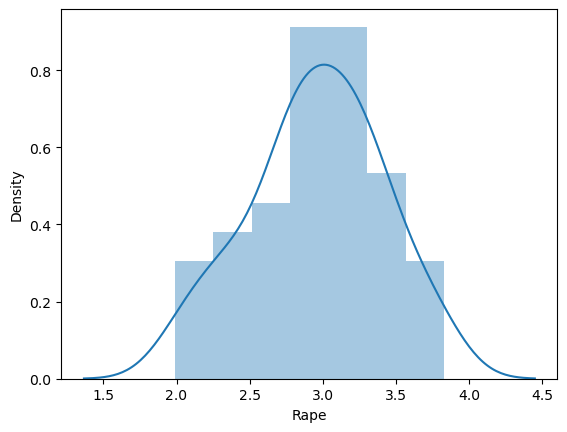

In [27]:
# Convert the Skewwed data to Normal distribution
df['Rape'] = np.log(df['Rape'])
print ('Skewness is', df['Rape'].skew())
sns.distplot(df['Rape'])
plt.show()
#If data is right skewwed then do log transform

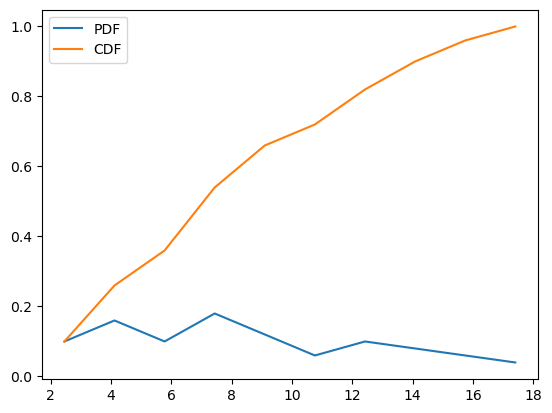

In [7]:
#Plot CDF and PDF of Murder

counts, bin_edges = np.histogram(df['Murder'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.legend()
plt.show()

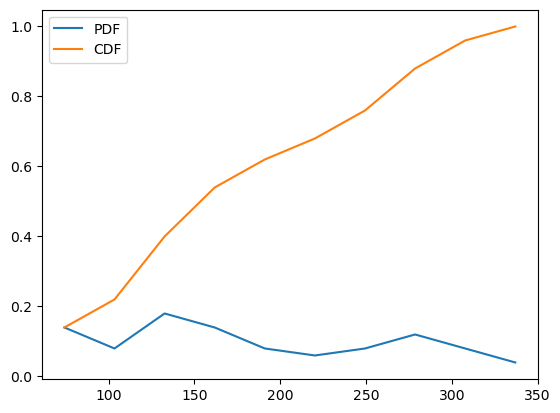

In [8]:
#Plot CDF of Assault

counts, bin_edges = np.histogram(df['Assault'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.legend()
plt.show()

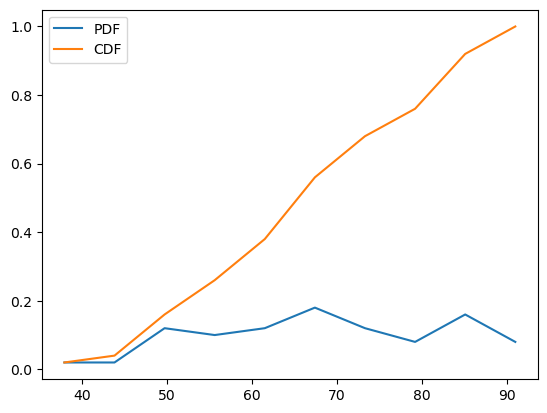

In [9]:
#Plot CDF of UrbanPop

counts, bin_edges = np.histogram(df['UrbanPop'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.legend()
plt.show()

[ 7.3  11.17 15.04 18.91 22.78 26.65 30.52 34.39 38.26 42.13 46.  ]
[0.14 0.26 0.46 0.64 0.76 0.84 0.9  0.92 0.96 1.  ]


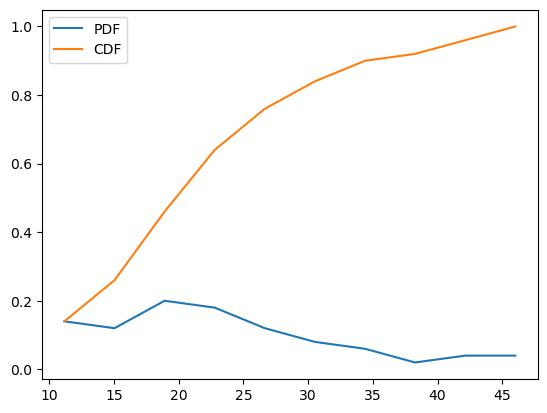

In [10]:
#Plot CDF of Rape

counts, bin_edges = np.histogram(df['Rape'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(bin_edges)
print(cdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.legend()
plt.show()

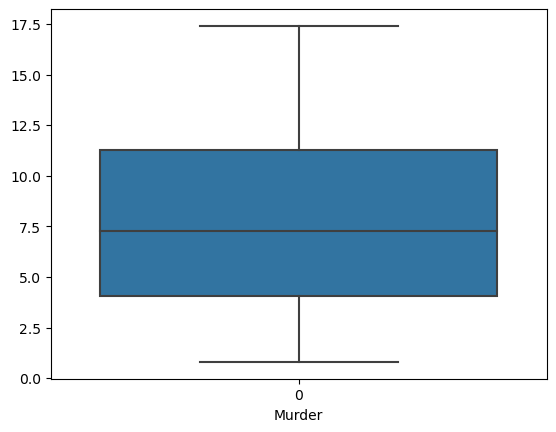

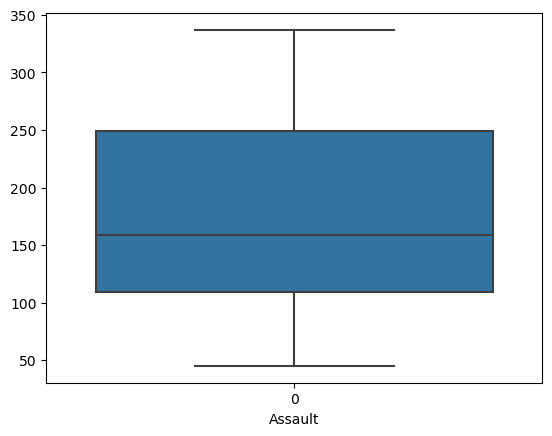

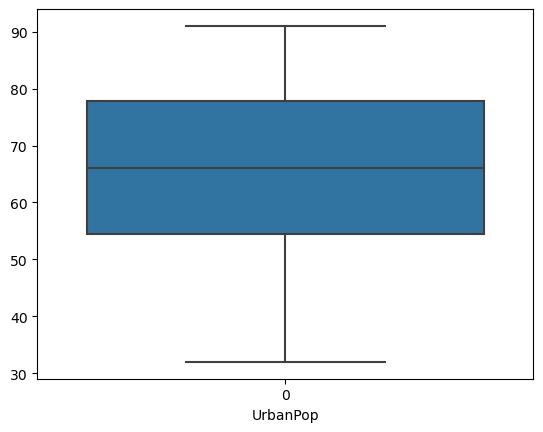

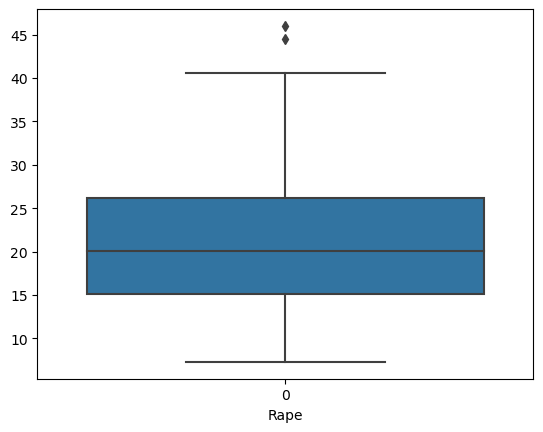

In [12]:
for i in range(0,len(m.columns)):
    sns.boxplot(df[l[i]])
    plt.xlabel(l[i])
    plt.show() 

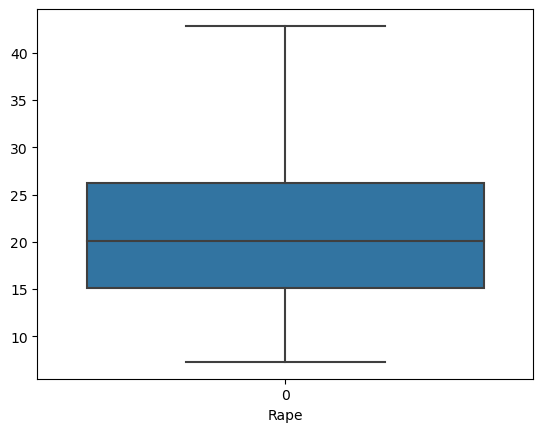

In [15]:
#To remove the outlier use winsorizer
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['Rape'])
df['Rape']=winsor.fit_transform(df[['Rape']])
sns.boxplot(df['Rape'])
plt.xlabel('Rape')
plt.show()
#from boxplot we easily see that outliers are removed..

## Bivariate analysis

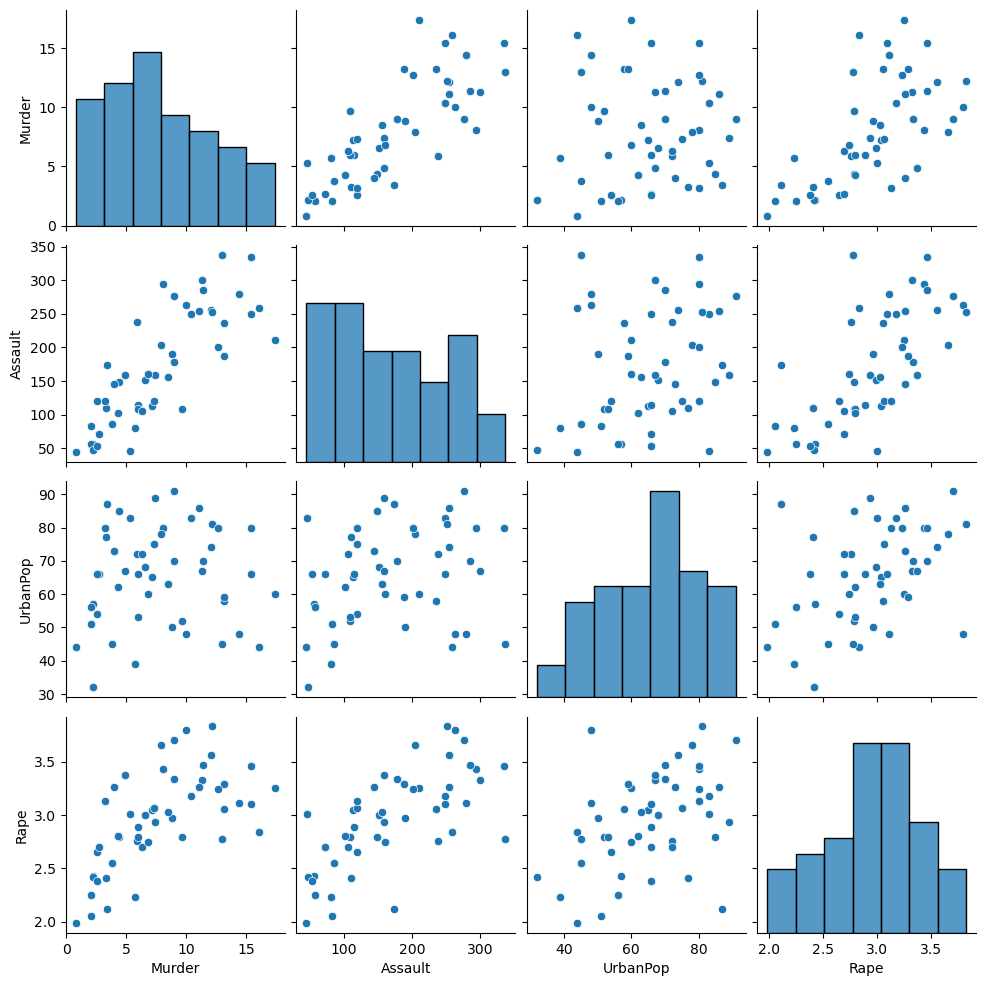

In [36]:
#Pairplot
sns.pairplot(df)
plt.show()

In [2]:
#Heatmap
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

NameError: name 'sns' is not defined

In [37]:
df.drop('UrbanPop',axis=1,inplace=True)

In [38]:
df.shape

(50, 4)

In [40]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
df_norm=norm_fun(df.iloc[:,1:])
b=df_norm.describe()

In [41]:
df_norm.head(10)

,Murder,Assault,Rape
0,0.746988,0.654110,0.579175
1,0.554217,0.746575,0.981990
2,0.439759,0.852740,0.785603
3,0.481928,0.496575,0.533767
4,0.493976,0.791096,0.932162
5,0.427711,0.544521,0.906125
6,0.150602,0.222603,0.227661
7,0.307229,0.660959,0.419464
8,0.879518,0.993151,0.801151
9,1.000000,0.568493,0.685855


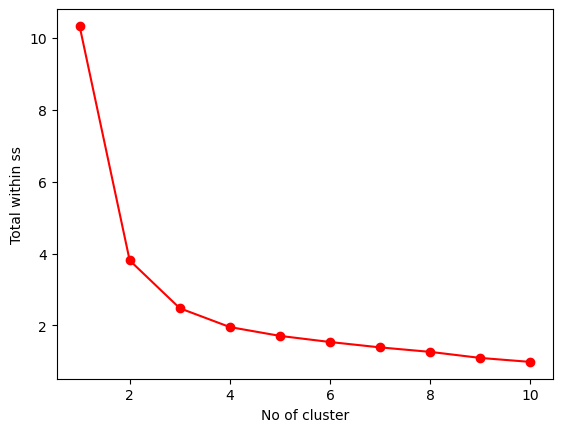

In [45]:
TWSS=[]
k=list(range(1,11))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS,'ro-')
plt.xlabel('No of cluster')
plt.ylabel('Total within ss')
plt.show()

In [46]:
Model=KMeans(n_clusters=3)
Model.fit(df_norm)
Model.labels_
             

array([0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [48]:
KCluster=pd.Series(Model.labels_)
df['KCluster']=KCluster


In [49]:
df.head()

,Name,Murder,Assault,Rape,KCluster
0,Alabama,13.2,236,3.054001,0
1,Alaska,10.0,263,3.795489,0
2,Arizona,8.1,294,3.433987,0
3,Arkansas,8.8,190,2.970414,2
4,California,9.0,276,3.703768,0


In [56]:
df_norm['KCluster']=KCluster

In [57]:
df_norm

,Murder,Assault,Rape,KCluster
0,0.746988,0.654110,0.579175,0
1,0.554217,0.746575,0.981990,0
2,0.439759,0.852740,0.785603,0
3,0.481928,0.496575,0.533767,2
4,0.493976,0.791096,0.932162,0
5,0.427711,0.544521,0.906125,0
6,0.150602,0.222603,0.227661,1
7,0.307229,0.660959,0.419464,2
8,0.879518,0.993151,0.801151,0
9,1.000000,0.568493,0.685855,0


In [58]:
df1=df_norm[df_norm['KCluster']==0]
df2=df_norm[df_norm['KCluster']==1]
df3=df_norm[df_norm['KCluster']==2]

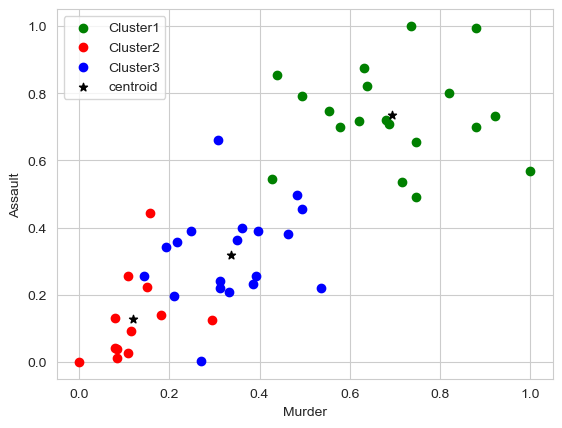

In [64]:
#Murder VS Assault
plt.scatter(df1['Murder'],df1['Assault'],color='green',label='Cluster1')
plt.scatter(df2['Murder'],df2['Assault'],color='red',label='Cluster2')
plt.scatter(df3['Murder'],df3['Assault'],color='blue',label='Cluster3')
plt.scatter(Model.cluster_centers_[:,0],Model.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

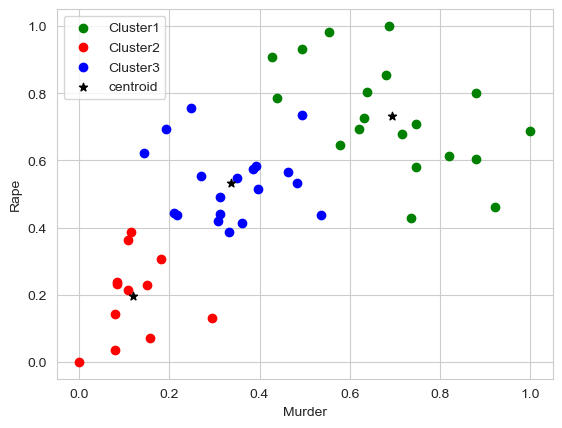

In [65]:
#Murder VS Rape
plt.scatter(df1['Murder'],df1['Rape'],color='green',label='Cluster1')
plt.scatter(df2['Murder'],df2['Rape'],color='red',label='Cluster2')
plt.scatter(df3['Murder'],df3['Rape'],color='blue',label='Cluster3')
plt.scatter(Model.cluster_centers_[:,0],Model.cluster_centers_[:,2],color='black',marker='*',label='centroid')
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.legend()
plt.show()

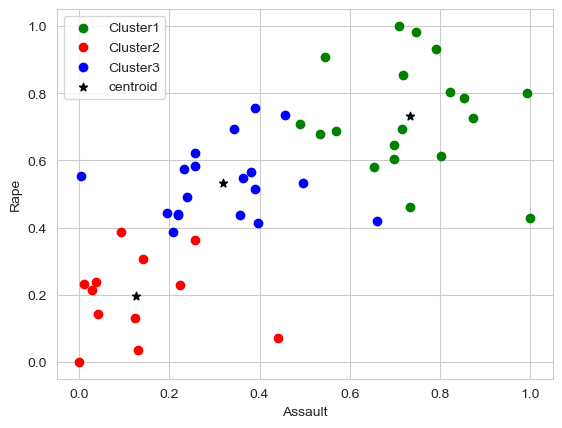

In [66]:
#Assault VS Rape
plt.scatter(df1['Assault'],df1['Rape'],color='green',label='Cluster1')
plt.scatter(df2['Assault'],df2['Rape'],color='red',label='Cluster2')
plt.scatter(df3['Assault'],df3['Rape'],color='blue',label='Cluster3')
plt.scatter(Model.cluster_centers_[:,1],Model.cluster_centers_[:,2],color='black',marker='*',label='centroid')
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.legend()
plt.show()